In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *


In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [18]:
au_df, au_dfc = create_matrix_single_region("Austin", year)
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)

In [19]:
out = {}
for region, df in zip(['Austin','SD'], [au_df, sd_df]):
    out[region] = {}
    for appliance in APPLIANCES_ORDER:
        out[region][appliance] = {}
        for month in range(1, 13):
            a_m_df = df['{}_{}'.format(appliance, month)]

            ratio = a_m_df.std()/a_m_df.mean()
            out[region][appliance][month] = ratio

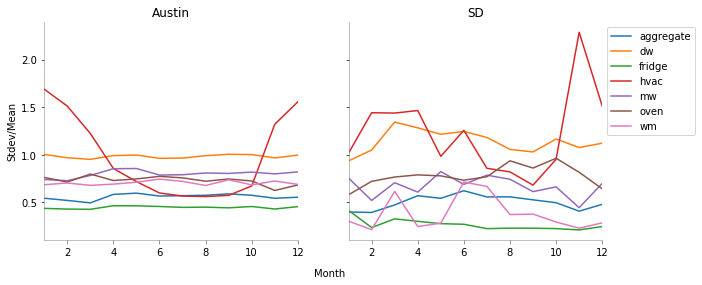

In [31]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
pd.DataFrame(out['Austin']).plot(kind='line', ax=ax[0], legend=False, title='Austin')
pd.DataFrame(out['SD']).plot(kind='line', ax=ax[1], legend=True, title='SD')
plt.legend(bbox_to_anchor=(1, 1))
format_axes(ax[0])
format_axes(ax[1])
ax[0].set_ylabel("Stdev/Mean")
fig.text(0.5, 0, 'Month')

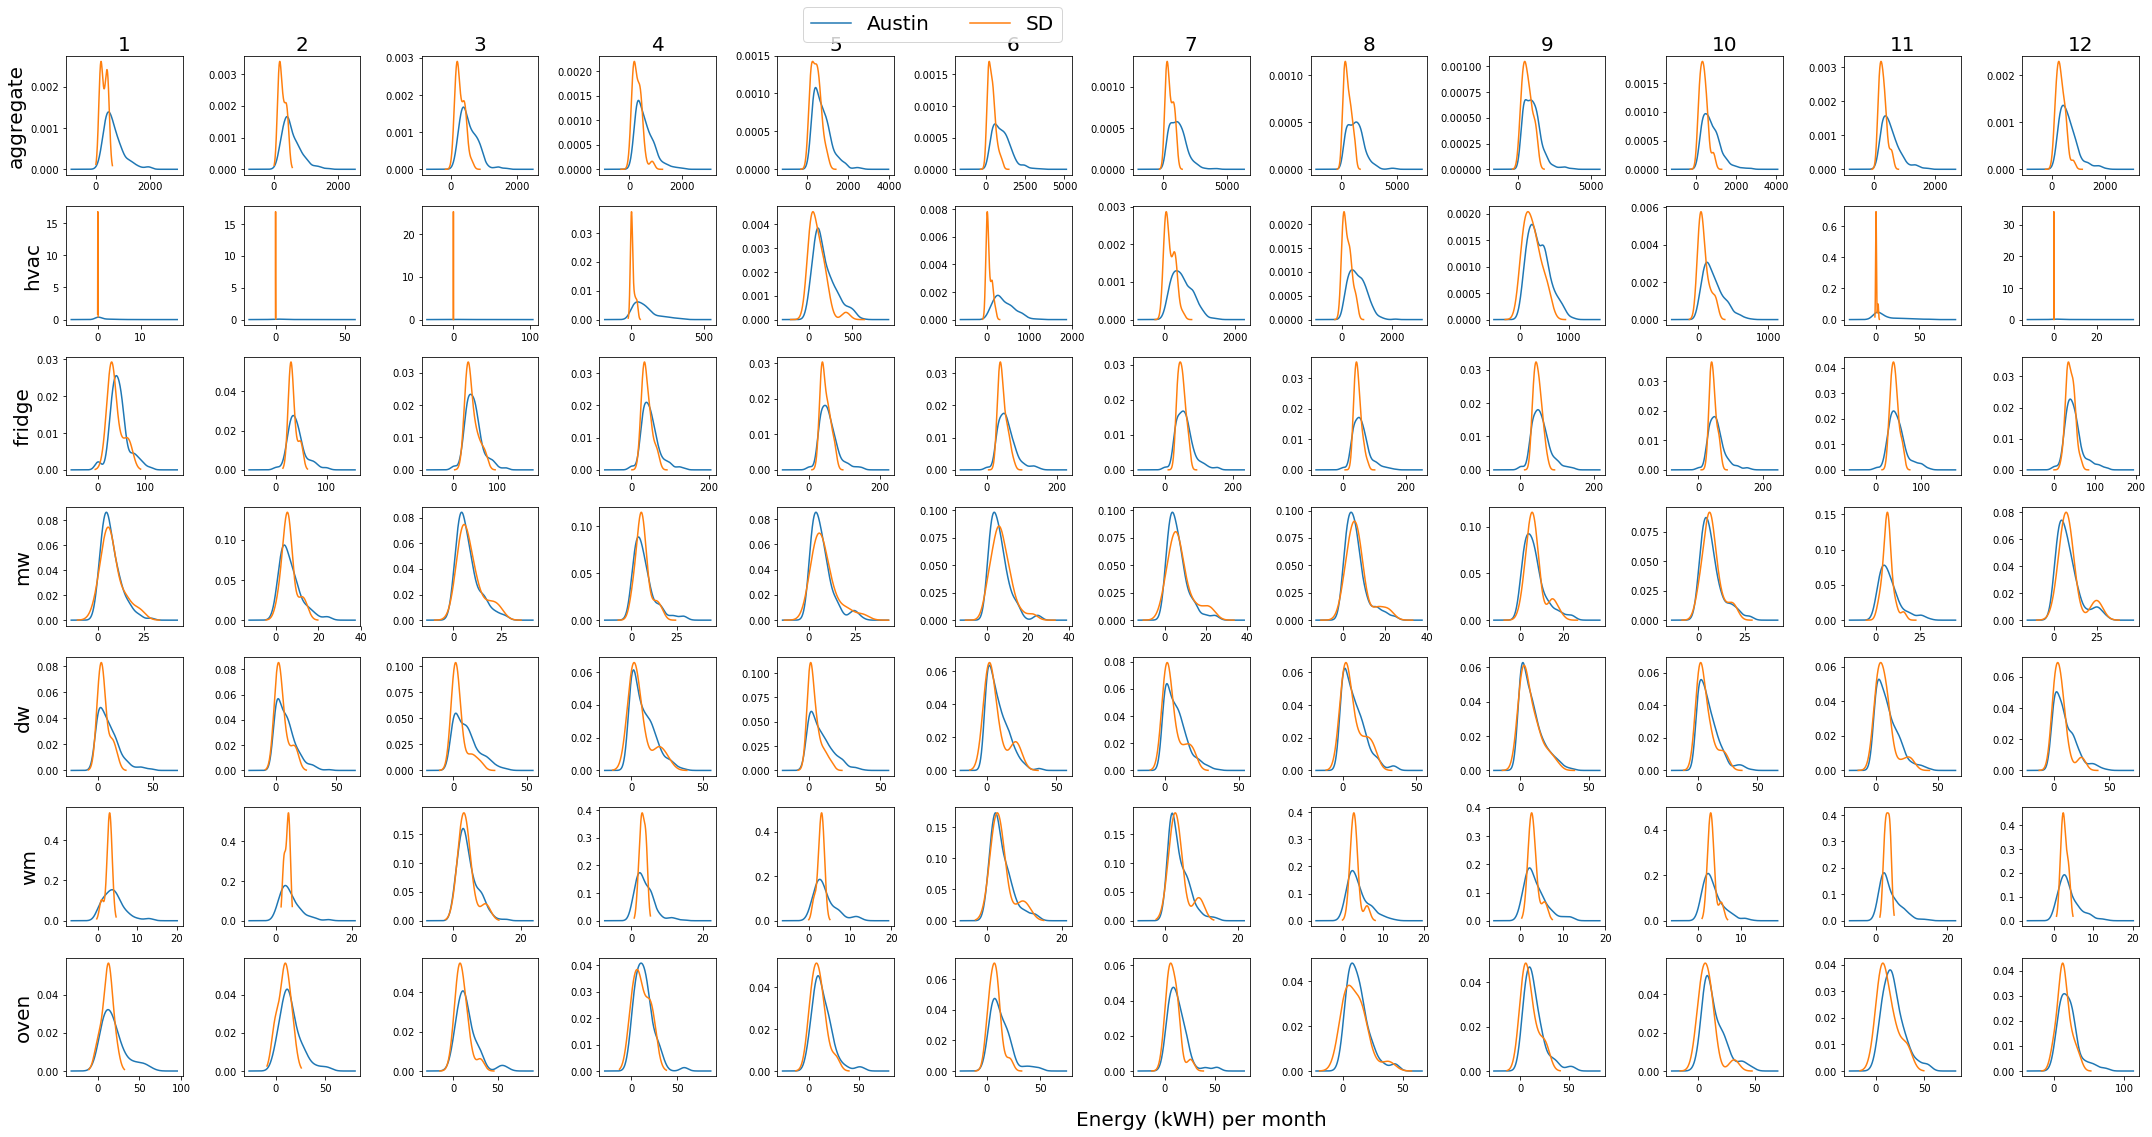

In [74]:
fig, ax = plt.subplots(nrows=7, ncols=12, figsize=(30, 15))
for i, appliance in enumerate(APPLIANCES_ORDER):
    
    for j, month in enumerate(range(1, 13)):
        au_df[['{}_{}'.format(appliance, month)]].plot(kind='kde', label='Au', ax=ax[i, j], legend=False)
        sd_df[['{}_{}'.format(appliance, month)]].plot(kind='kde', label='SD', ax=ax[i, j], legend=False)
        ax[i, j].set_ylabel("")
        ax[0, j].set_title(month, fontsize=20)
    ax[i, 0].set_ylabel(appliance, fontsize=20)
ax[0, 5].legend(['Austin', 'SD'], bbox_to_anchor=(1, 1.5), ncol=2, fontsize=20)
fig.tight_layout()
fig.text(0.5, -0.02, 'Energy (kWH) per month', fontsize=20)
plt.savefig("/Users/nipunbatra/Desktop/res.pdf", bbox_inches="tight")

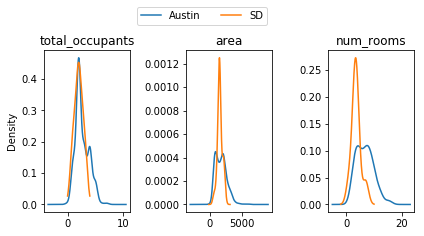

In [93]:
fig, ax = plt.subplots(ncols=3, figsize=(6, 3))
for i, feature in enumerate(['total_occupants', 'area', 'num_rooms']):
    au_df[feature].plot(kind='kde', ax=ax[i])

    sd_df[feature].plot(kind='kde', ax=ax[i])
    ax[i].set_title(feature)
    if i>0:
        ax[i].set_ylabel("")
ax[1].legend(['Austin','SD'], bbox_to_anchor=(1, 1.3), ncol=2)
fig.tight_layout()
plt.savefig("/Users/nipunbatra/Desktop/static.pdf", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(ncols=2)
for i,feature in enumerate(['area','num_rooms']):
    
   
    au_df[['{}_{}'.format(appliance, month)]].plot(kind='kde', label='Au', ax=ax[i, j], legend=False)
    sd_df[['{}_{}'.format(appliance, month)]].plot(kind='kde', label='SD', ax=ax[i, j], legend=False)
        ax[i, j].set_ylabel("")
        ax[0, j].set_title(month, fontsize=20)
    ax[i, 0].set_ylabel(appliance, fontsize=20)
ax[0, 5].legend(['Austin', 'SD'], bbox_to_anchor=(1, 1.5), ncol=2, fontsize=20)
fig.tight_layout()
fig.text(0.5, -0.02, 'Energy (kWH) per month', fontsize=20)
#plt.savefig("/Users/nipunbatra/Desktop/res.pdf", bbox_inches="tight")